In [27]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [28]:
#Asignando variable a valores nulos
sentinels = {'PRECIP': ['Nulo'], 'EVAP': ['Nulo'], 'TMAX': ['Nulo'],'TMIN': ['Nulo']}
#Leyendo el archivo
df0 = pd.read_csv("cajeme.txt",skiprows=0,sep='\s+',na_values=sentinels)

In [29]:
#Definiendo el dataframe
df = pd.DataFrame(df0)

In [30]:
#Cambiando la columna de fecha a formato fecha
df['FECHAN'] = pd.to_datetime(df.apply(lambda x: x['FECHA'], 1), dayfirst=True)
df = df.drop(['FECHA'], 1)

In [31]:
#Mostrando los tipos
df.dtypes

PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHAN    datetime64[ns]
dtype: object

In [32]:
#Mostrando descripción del data frame
df.describe()

,PRECIP,EVAP,TMAX,TMIN
count,10531.000000,7324.000000,10503.000000,10514.000000
mean,0.894511,5.814091,32.601047,14.880873
std,5.948456,2.431426,5.770682,6.881583
min,0.000000,0.200000,13.000000,-2.500000
25%,0.000000,3.900000,28.000000,9.000000
50%,0.000000,5.500000,33.000000,13.000000
75%,0.000000,7.600000,37.500000,22.000000
max,184.500000,14.900000,47.500000,29.000000


In [33]:
#Definiendo columnas de año y mes
df['MES'] = df['FECHAN'].dt.month
df['AÑO'] = df['FECHAN'].dt.year
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHAN,MES,AÑO
0,0.0,1.2,25.0,7.0,1980-01-01,1,1980
1,0.0,1.7,22.0,8.0,1980-01-02,1,1980
2,0.0,1.9,25.0,9.0,1980-01-03,1,1980
3,0.0,1.8,26.0,6.0,1980-01-04,1,1980
4,0.0,2.0,26.0,4.0,1980-01-05,1,1980


In [34]:
#Buscando el número de años
NumA = len(df['AÑO'].unique())
NumA

32

In [54]:
#Haciendo arreglo de meses y de años
init = 1980
AÑOS = [init + i for i in range(0, NumA)]
init2 = 1
MESES = [init2 + i for i in range(0, 12)]


In [36]:
#Calculando promedio de precipitaciones y temperaturas mensuales
PRECIPPROPMES = [df[df.MES==(init2 + i)].PRECIP.sum()/NumA for i in range (0,12)]
TMAXPROMMES = [df[df.MES==(init2 + i)].TMAX.mean() for i in range (0,12)]
TMINPROMMES = [df[df.MES==(init2 + i)].TMIN.mean() for i in range (0,12)]

TMINPROMMES

[7.488407258064516,
 8.010216346153847,
 8.960457856399584,
 11.10344827586207,
 14.390681003584229,
 20.22530864197531,
 24.048984468339306,
 24.32373271889401,
 23.23735632183908,
 18.449944382647384,
 12.217857142857143,
 8.193763919821826]

In [37]:
#Creando data frame para datos mensuales
d = {'MES': MESES , 'PRECIPPROPMES':PRECIPPROPMES,'TMAXPROMMES': TMAXPROMMES,'TMINPROMMES': TMINPROMMES }
dmes = pd.DataFrame(data=d)
dmes

,MES,PRECIPPROPMES,TMAXPROMMES,TMINPROMMES
0,1,24.140625,25.384577,7.488407
1,2,10.696875,26.821084,8.010216
2,3,2.359375,29.330208,8.960458
3,4,1.493750,32.628308,11.103448
4,5,0.584375,35.624851,14.390681
5,6,3.484375,38.114710,20.225309
6,7,60.290625,38.273653,24.048984
7,8,66.834375,38.229527,24.323733
8,9,76.212500,37.452819,23.237356
9,10,21.475000,35.120824,18.449944


In [38]:
#Calculando promedio de precipitaciones y temperaturas anuales
PRECIPPROPAÑO = [df[df.AÑO==(init + i)].PRECIP.sum()/NumA for i in range (0,NumA)]
TMAXPROMAÑO = [df[df.AÑO==(init + i)].TMAX.mean() for i in range (0,NumA)]
TMINPROMAÑO = [df[df.AÑO==(init + i)].TMIN.mean() for i in range (0,NumA)]


In [39]:
#Creando data frame para datos anuales
d = {'AÑO': AÑOS , 'PRECIPPROPAÑO':PRECIPPROPAÑO,'TMAXPROMAÑO': TMAXPROMAÑO,'TMINPROMAÑO': TMINPROMAÑO }
daño = pd.DataFrame(data=d)
daño

,AÑO,PRECIPPROPAÑO,TMAXPROMAÑO,TMINPROMAÑO
0,1980,5.703125,31.431694,16.181694
1,1981,14.921875,31.073973,16.008219
2,1982,6.796875,31.394521,14.813699
3,1983,2.890625,27.158333,8.800000
4,1984,18.109375,30.625455,15.483636
5,1985,4.046875,27.049451,9.313187
6,1986,5.062500,31.731405,14.409091
7,1987,3.687500,31.702041,13.469388
8,1988,3.156250,32.093333,12.581395
9,1989,0.437500,22.193548,4.548387


In [40]:
#Creando arreglo con labels de mes
MESESlabel = calendar.month_name[1:13]

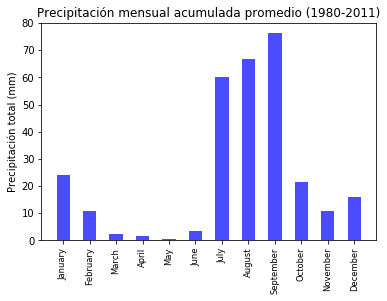

In [41]:
#Creando gráfica para precipitación mensual acumulada promedio
X = MESESlabel
N = np.arange(len(X))
Y = PRECIPPROPMES 
 
plt.bar(N, Y,  width=0.5,align='center', alpha=0.7,color='b')
plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.ylabel('Precipitación total (mm)')
plt.title('Precipitación mensual acumulada promedio (1980-2011)')
plt.savefig('Precip_mensual',plt=2000)
plt.show()

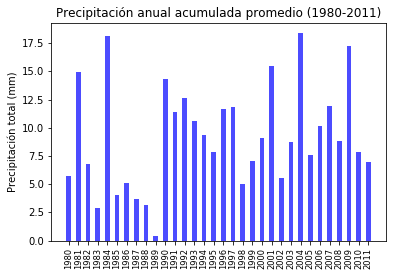

In [42]:
#Creando gráfica para precipitación mensual acumulada promedio
X = AÑOS
N = np.arange(len(X))
Y = PRECIPPROPAÑO 
 
plt.bar(N, Y,  width=0.5,align='center', alpha=0.7,color='b')
plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.ylabel('Precipitación total (mm)')
plt.title('Precipitación anual acumulada promedio (1980-2011)')
plt.savefig('Precip_anual',plt=2000)
plt.show()

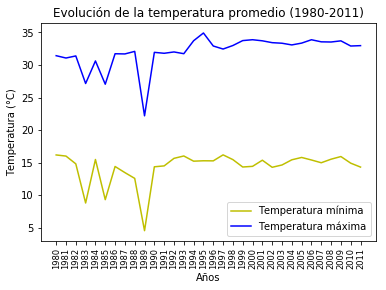

In [43]:
#Creando gráfica para precipitación mensual acumulada promedio
X = AÑOS
N = np.arange(len(X))
Y1 = TMINPROMAÑO
Y2 = TMAXPROMAÑO
 
plt.plot(Y1, label = "Temperatura mínima", color = 'y')   
plt.plot(Y2, label = "Temperatura máxima", color = 'b')

plt.xlabel("Años")   
plt.ylabel("Temperatura (°C)")  

plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)

plt.legend()
plt.title('Evolución de la temperatura promedio (1980-2011)')
plt.savefig('Temp_anual',plt=2000)
plt.show()

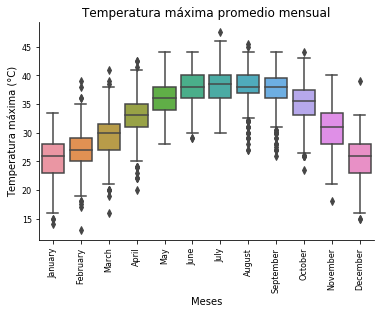

In [44]:
#Diagrama de caja de la temperatura máxima promedio mensual
box = sns.boxplot(x="MES", y="TMAX", data=df)
box.set( xlabel= 'Meses', ylabel= 'Temperatura máxima (°C)')
box.set_xticklabels(MESESlabel, rotation=90 )
box.tick_params(labelsize=8)
sns.despine()
plt.title('Temperatura máxima promedio mensual')
plt.savefig('cajamax_mensual',plt=2000)
plt.show()     

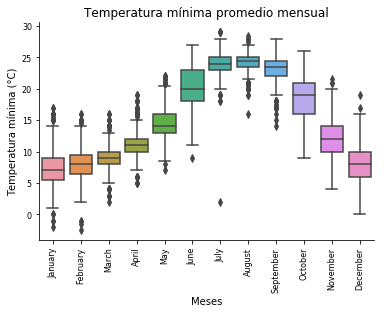

In [45]:
#Diagrama de caja de la temperatura mínima promedio mensual
box = sns.boxplot(x="MES", y="TMIN", data=df)
box.set( xlabel= 'Meses', ylabel= 'Temperatura mínima (°C)')
box.set_xticklabels(MESESlabel, rotation=90 )
box.tick_params(labelsize=8)
sns.despine()
plt.title('Temperatura mínima promedio mensual')
plt.savefig('cajamin_mensual',plt=2000)
plt.show()     

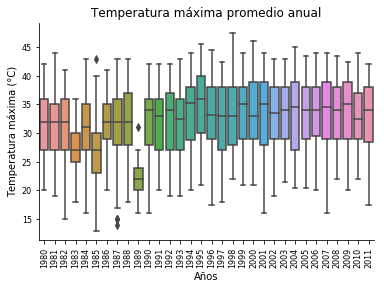

In [46]:
#Diagrama de caja de la temperatura máxima promedio anual
box = sns.boxplot(x="AÑO", y="TMAX", data=df)
box.set( xlabel= 'Años', ylabel= 'Temperatura máxima (°C)')
box.set_xticklabels(box.get_xticklabels(), rotation=90 )
box.tick_params(labelsize=8)
sns.despine()
plt.title('Temperatura máxima promedio anual')
plt.savefig('cajamax_anual',plt=2000)
plt.show()

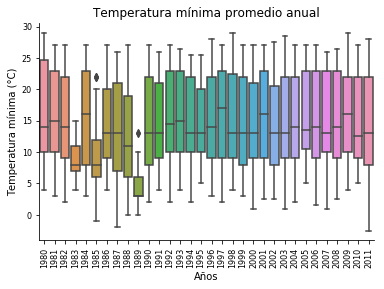

In [47]:
#Diagrama de caja de la temperatura mínima promedio anual
box = sns.boxplot(x="AÑO", y="TMIN", data=df)
box.set( xlabel= 'Años', ylabel= 'Temperatura mínima (°C)')
box.set_xticklabels(box.get_xticklabels(), rotation=90 )
box.tick_params(labelsize=8)
sns.despine()
plt.title('Temperatura mínima promedio anual')
plt.savefig('cajamin_anual',plt=2000)
plt.show()

In [ ]:
#Creando data frame para datos mensuales
##labels = MESESlabel
#d = {'AÑOS': AÑOS, 'PRECIPPROPAÑO':PRECIPPROPAÑO,'TMAXPROMAÑO': TMAXPROMAÑO,'TMINPROMAÑO': TMINPROMAÑO }
#TMAXMES = [df[df.MES==(init2 + i)].TMAX() for i in range (0,12)]
#dmesetem = pd.DataFrame(data=d)
#dmesetem
#TMAXMES



#for i in range (0,12):
#    TMAXMES[i] = [df.MES==(init2 + i).TMAX()] 



#TMINPROMMES = [df[df.MES==(init2 + i)].TMIN.mean() for i in range (0,12)]
#TMINPROMMES
TMAXMES=[]
for i in range (0,12):
    TMAXMES.append( df[df.MES==i].TMAX)
    
TMAXMES
    

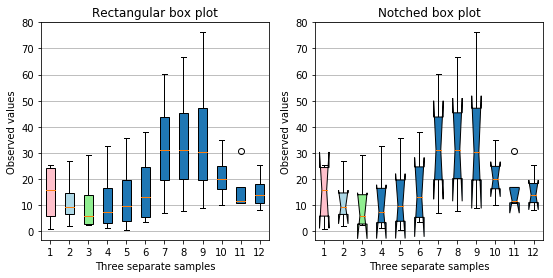

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
#np.random.seed(19680801)
all_data = dmes
labels = ['1', '2', '3','4','5','6','7','8','9','10','11','12']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('Rectangular box plot')

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1].set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

In [ ]:
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
all_data

In [49]:
p1 = [1,2,3,4,5]
#p2 = [6,7,8,9,10]
#p3 = [11,12,13,14,15]
m =[]
#for i in range(1,4):

#exec('m.append(p{})'.format(i)) 
m.append(p1)
m

#inicial = 1

#mes1=[]
#mes2=[]

#mes1=df[df.MES==1].TMAX
#mes2=df[df.MES==2].TMAX
#for i in range(1,13):
#mesestmax=[]

#mesestmax.append(mes1)
#mesestmax.append(mes2)
#mesestmax

#mesestmax



#meses =[]
#for i in range(1,4):
 #  exec('meses.append(p{})'.format(i)) 
#meses

[[1, 2, 3, 4, 5]]

In [53]:
#mes1=[df[df.MES==1].TMAX]
#Creando data frame para datos mensuales
#d = {'MES': MESES , 'TMAX':mes1[0] }
#dmes = pd.DataFrame(data=d)
#dmes
#mes1
#mes2=df[df.MES==2].TMAX
#for i in range(1,13):
#mesestmax=[]

#mesestmax.append(mes1)
#mesestmax.append(mes2)
#mesestmax

#df.loc[:,'MES']
mes1 = df[df['MES'] ==1]['TMAX']
mes1

0        25.0
1        22.0
2        25.0
3        26.0
4        26.0
5        20.0
6        25.0
7        25.0
8        25.0
9        26.0
10       24.0
11       27.0
12       28.0
13       26.0
14       24.0
15       25.0
16       26.0
17       24.0
18       24.0
19       22.0
20       20.0
21       20.0
22       24.0
23       25.0
24       22.0
25       24.0
26       25.0
27       25.0
28       25.0
29       23.0
         ... 
10167    22.0
10168    21.0
10169    25.5
10170    27.0
10171    25.0
10172    24.0
10173    23.0
10174    25.5
10175    26.0
10176    25.0
10177    26.0
10178    24.0
10179    27.0
10180    28.0
10181    29.0
10182    30.0
10183    28.0
10184    28.5
10185    28.0
10186    29.0
10187    27.5
10188    27.0
10189    26.0
10190    27.0
10191    25.0
10192    26.0
10193    25.0
10194    26.0
10195    24.5
10196    24.0
Name: TMAX, Length: 992, dtype: float64

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
all_data = mesestmax
labels = ['1', '2', '3','4','5','6','7','8','9','10','11','12']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('Rectangular box plot')

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1].set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

NameError: name 'mesestmax' is not defined